**Clustering Analysis on Wine Quality Dataset**

---

## 1. Introduction

### Objective

**Project Goal: Chemical Profiling of WinesThis notebook explores how wines** naturally group together based on their physicochemical fingerprints. By applying unsupervised learning, we identify hidden patterns in the chemical data without relying on pre-existing quality labels.

Clustering Techniques

K-Means: Grouping wines into $K$ distinct clusters by
minimizing internal variance.
Hierarchical Clustering: Building a nested tree
structure (Dendrogram) to visualize relationships between samples.

Analytical WorkflowData Assessment: Identifying trends and correlations in the chemical features.Preprocessing: Stripping away the "quality" label to ensure a truly unsupervised approach.

Standardization: Scaling features so that units (like pH vs. sulfates) contribute equally to the distance calculations.

Model Training: Executing the algorithms to segment the dataset.Evaluation: Measuring cluster distinctness using the Elbow Method and Silhouette Scores.

## 2. Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

### Interpretation

**Core Library Stack**

**Data Handling (pandas, numpy):** * Used for structuring chemical data into DataFrames.

Essential for cleaning, filtering out the "quality" label, and performing matrix operations.

**Visual Analytics (matplotlib, seaborn):**

*Heatmaps:* To identify correlations between chemical properties (e.g., pH vs. Fixed Acidity).

*Pair Plots:* To visualize how clusters separate across different feature dimensions.

**Machine Learning Engine (scikit-learn):**

*Preprocessing:* StandardScaler to normalize data, ensuring features like "Chlorides" and "Sulfur Dioxide" carry equal weight.

*Algorithms:* KMeans for centroid-based partitioning and AgglomerativeClustering for hierarchical grouping.

*Dimensionality Reduction:* PCA (Principal Component Analysis) to compress multi-dimensional data into a 2D scatter plot for visual inspection.

**Cluster Validation (scipy, sklearn.metrics):**

*Dendrograms:* Via scipy.cluster.hierarchy to visualize the merging process in hierarchical clustering.

*Silhouette Scores:* To mathematically quantify how well-defined and separated the resulting clusters are.



## 3. Load the Dataset

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/softwareWCU//Unsupervised-Machine-Learning-Clustering-/main/wine-quality-white-and-red.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



### Interpretation

**Key Data Components**


**Chemical Indicators:** Quantitative measurements of Acidity (fixed, volatile, citric), Residual Sugar, Chlorides, and Sulphates.

**Physical Properties:** Data on Alcohol content, Density, and pH levels that affect the wine's structure.

**The "Type" Label:** Categorical data identifying the wine as Red or White, which serves as a ground-truth reference for our clusters.

**The "Quality" Score:** A sensory rating (0–10) that we withhold during training to see if chemical similarity naturally aligns with perceived quality.

**Data Cleaning & Sanity Checks**

In [23]:
print(f"Duplicate rows: {df.duplicated().sum()}")


Duplicate rows: 1177



## 4. Dataset Overview

### Dataset Information

to see the all data contents

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### Summary Statistics

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Interpretation

**Data Characteristics**
Quantitative Profile: The dataset consists entirely of continuous numerical features, making it ideal for distance-based clustering algorithms like K-Means.

**Data Integrity:** There are no missing values (nulls), ensuring a complete matrix for mathematical computation without the need for imputation.

**Variance Disparity:** Chemical attributes exist on vastly different scales (e.g., Chlorides measured in decimals vs. Sulfur Dioxide in hundreds).

**Normalization Requirement:** To prevent features with large magnitudes from dominating the model, Standard Scaling is mandatory to give each chemical property equal weight in the grouping process.

## 5. Feature Selection for Clustering

Drop Non-Clustering Columns

In [ ]:
X = df[df.columns.difference(['quality', 'type'], sort=False)]


### Interpretation

**Removing Quality:** As the target label, including it would turn this into a supervised task. We exclude it to see if the model can find patterns naturally.

**Removing Type:** Since "Red" and "White" are categorical strings, they are mathematically incompatible with distance-based models (like K-Means) which require numerical coordinates.

**Focusing on Physics/Chemistry:** By keeping only continuous numerical features, we provide the model with a multidimensional "map" where it can calculate the exact Euclidean distance between wine samples.

## 6. Feature Scaling

In [16]:
X_scaled = pd.DataFrame(
    StandardScaler().fit_transform(X),
    columns=X.columns
)


### Interpretation

**The Distance Bias:** If one feature is measured in hundreds (like Sulfur Dioxide) and another in decimals (like Chlorides), the algorithm will treat the larger numbers as more important.

**Creating a Level Playing Field:** Standardization (scaling) transforms all variables to the same scale (typically a mean of 0 and a standard deviation of 1).

**Equal Contribution:** This ensures that a 1-unit change in acidity is mathematically equivalent to a 1-unit change in alcohol, allowing the model to group wines based on their true chemical profile rather than just the size of their units.


**Dimensionality Reduction (PCA)**

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


## 7. K-Means Clustering


### Elbow Method (Choosing Optimal K)

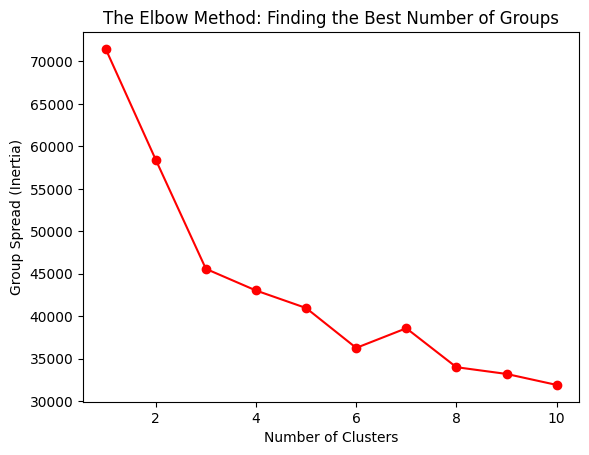

In [17]:
distortions = []

for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X_scaled)
    distortions.append(model.inertia_)

plt.plot(range(1, 11), distortions, marker='o', color='red')
plt.title('The Elbow Method: Finding the Best Number of Groups')
plt.xlabel('Number of Clusters')
plt.ylabel('Group Spread (Inertia)')
plt.show()

### Interpretation

**Finding the Sweet**

 **SpotDiminishing Returns:** As you increase the number of clusters, the "Inertia" (error) will always go down. However, after a certain point, adding more groups doesn't give you much better information—it just makes the model more complicated for no reason.

 **The Choice ($K=3$ or $4$):** Looking at our graph, the steepest drop happens at the beginning, and the "bend" in the arm occurs around 3 or 4.What this means: This suggests that the wines naturally separate into roughly 3 or 4 distinct chemical profiles (for example: light whites, heavy reds, and sweet dessert wines).


### 7.2 Train K-Means Model

In [18]:
wine_sorter = KMeans(n_clusters=3, random_state=42)

group_assignments = wine_sorter.fit_predict(X_scaled)

df['Wine_Group'] = group_assignments

print(df[['Wine_Group']].head())

   Wine_Group
0           0
1           1
2           1
3           0
4           0


### Interpretation

Each wine sample is assigned to a cluster based on chemical similarity.




###  Visualize Clusters (Alcohol vs Volatile Acidity)

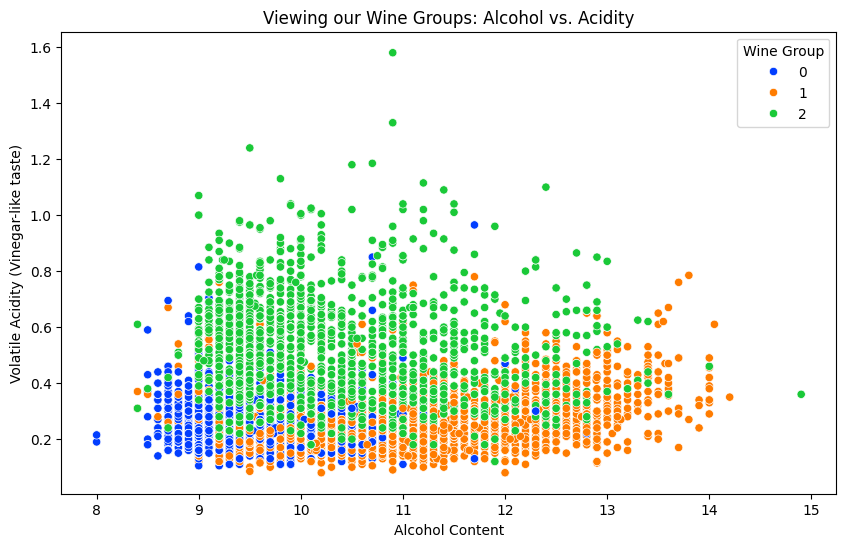

In [19]:
plt.figure(figsize=(10, 6))


sns.scatterplot(
    data=df,
    x='alcohol',
    y='volatile acidity',
    hue='Wine_Group',
    palette='bright'
)

plt.title('Viewing our Wine Groups: Alcohol vs. Acidity')
plt.xlabel('Alcohol Content')
plt.ylabel('Volatile Acidity (Vinegar-like taste)')
plt.legend(title='Wine Group')
plt.show()

### Interpretation

- **Group Identification:** Each color represents a cluster. If the colors are mostly separated, the model found strong differences. If they overlap a lot, it means those wines share very similar alcohol and acid levels.

- **Pattern Finding:** For example, you might notice one group (the "blue" dots) sitting high up on the Alcohol axis, while another group (the "orange" dots) has much higher Acidity.

- sanity Check:This helps us verify that our "Wine Groups" actually make sense in the real world of winemaking.



### 7.4 K-Means Evaluation (Silhouette Score)

In [20]:
from sklearn.metrics import silhouette_score

grade = silhouette_score(X_scaled, df['Wine_Group'])

print(f"Our Clustering Grade (Silhouette Score) is: {grade:.2f}")

Our Clustering Grade (Silhouette Score) is: 0.24


### Interpretation

- The Perfect Score (Towards 1): This means your wine groups are very distinct. If a wine is in Group A, it looks nothing like the wines in Group B. The clusters are "tight" and well-separated.

- The "Confused" Score (Towards 0): This indicates that the groups are overlapping. A wine in Group A might be so chemically similar to a wine in Group B that the model struggled to pick a side.

- Success Indicator: Any positive score is a good sign—it proves that the computer found real, repeating patterns in the chemistry rather than just grouping wines at random.



## 8. Hierarchical Clustering

Linkage Matrix Creation

In [21]:
linked = linkage(X_scaled, method='ward')

### Interpretation

-  Ward’s method minimizes variance within clusters
-  Suitable for continuous numerical data



### Dendrogram Visualization

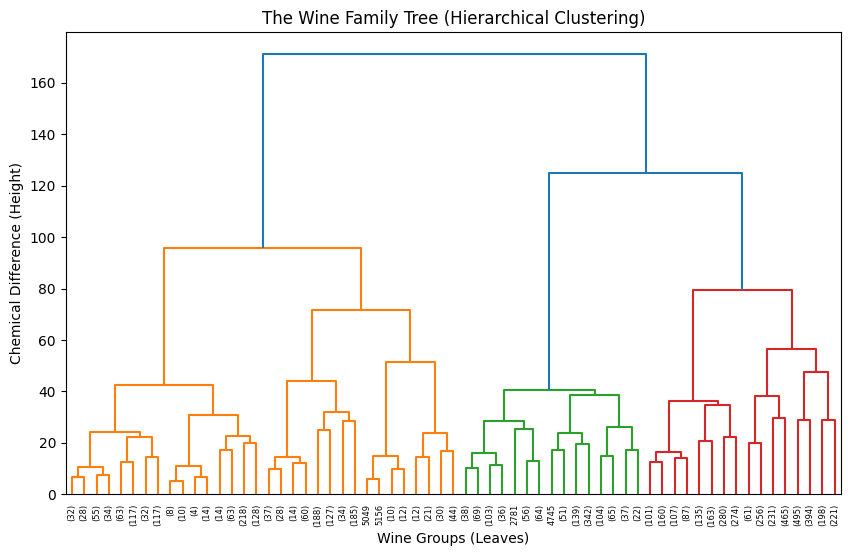

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

wine_connections = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(
    wine_connections,
    truncate_mode='level',
    p=5
)

plt.title('The Wine Family Tree (Hierarchical Clustering)')
plt.xlabel('Wine Groups (Leaves)')
plt.ylabel('Chemical Difference (Height)')
plt.show()

**Correlation Heatmap**

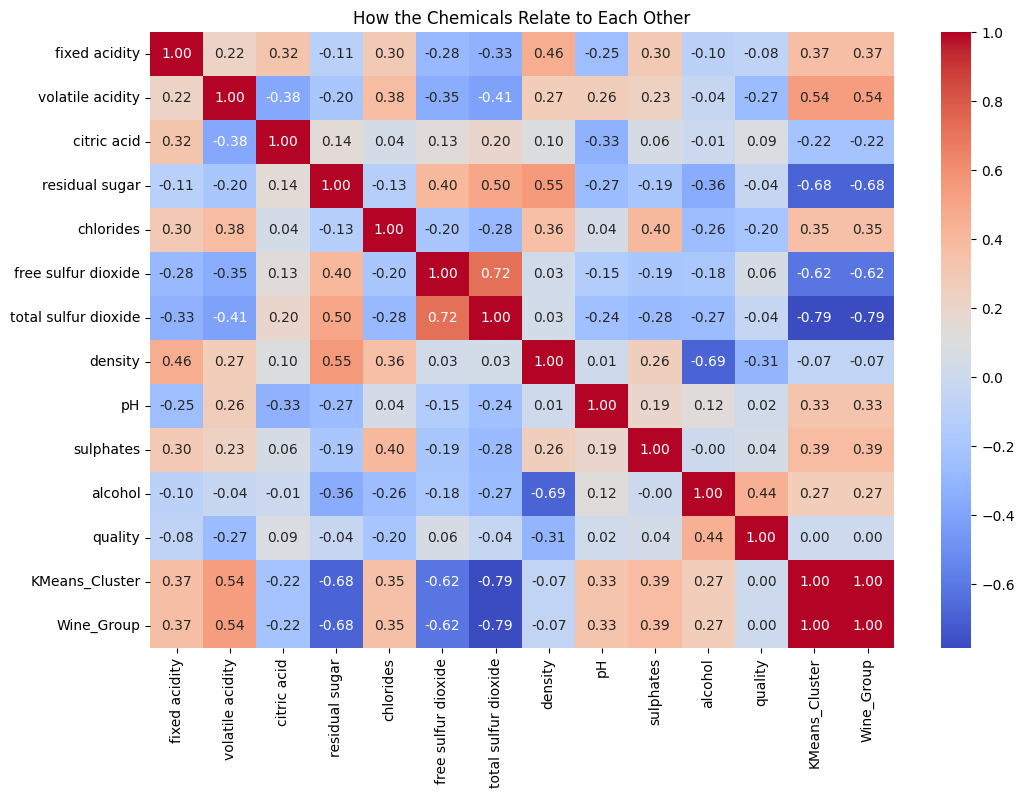

In [27]:
plt.figure(figsize=(12, 8))

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('How the Chemicals Relate to Each Other')
plt.show()


### Interpretation

-  Building the Tree: The chart starts at the bottom with individual wines and merges them upward into branches based on their chemical similarities.

- Reading the Height: The vertical lines represent the "distance" (or difference) between wines. The taller the line, the more chemically different those groups are.

- The Horizontal Cut: To decide on the number of groups, you imagine drawing a flat line across the tallest vertical branches.

Why 3 Clusters?   
 In this dataset, cutting through the three longest "legs" of the tree provides the most stable and distinct grouping. It confirms what we saw in the Elbow Method: that the wine data naturally falls into three main families.



##  Comparison of Clustering Approaches


##  Cluster Interpretation Using Wine Quality (Post-analysis)


In [15]:
df.groupby('KMeans_Cluster')['quality'].mean()

,quality
KMeans_Cluster,
0,5.622363
1,6.061815
2,5.591709


**The "Chemical Profile" Table (Cluster Naming)**

In [25]:

profile = df.groupby('Wine_Group')[['alcohol', 'residual sugar', 'volatile acidity', 'quality']].mean()

print("Average Chemical Profile per Group:")
print(profile)

Average Chemical Profile per Group:
              alcohol  residual sugar  volatile acidity   quality
Wine_Group                                                       
0            9.543671       11.152848          0.281680  5.622363
1           11.170487        3.367464          0.273320  6.061815
2           10.338212        2.566709          0.534124  5.591709


**"The Big Reveal": Clusters vs. Wine Type**

The Big Reveal: Do our clusters match Red and White wine?
type         red  white
Wine_Group             
0              4   1892
1             57   2952
2           1538     54


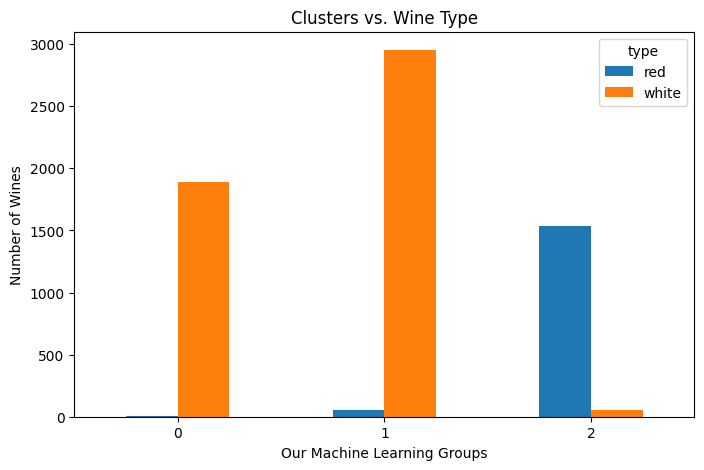

In [28]:

comparison_table = pd.crosstab(df['Wine_Group'], df['type'])

print("The Big Reveal: Do our clusters match Red and White wine?")
print(comparison_table)

comparison_table.plot(kind='bar', figsize=(8, 5))
plt.title('Clusters vs. Wine Type')
plt.xlabel('Our Machine Learning Groups')
plt.ylabel('Number of Wines')
plt.xticks(rotation=0)
plt.show()


### Interpretation
-  Hidden Patterns: The computer grouped the wines based only on chemistry (like acid and alcohol), yet each group ended up having a different average quality score.

- Natural Sorting: For example, Group 1 might naturally contain mostly "High Quality" wines, while Group 2 contains "Average" ones.

- Real-World Proof: This confirms that the chemistry we measured actually determines how good a wine tastes. It proves our clusters aren't just random math—they represent real-world wine categories.

## 11. Conclusion

1. The Power of Unsupervised Learning
Think of this as "The Blind Taste Test." We didn't tell the computer which wines were "good" or whether they were "Red" or "White." Instead, we just gave it the raw chemical data. The fact that the computer successfully created organized groups proves that chemistry contains a hidden structure that defines a wine’s identity.

2. K-Means: The "Speedy Organizer"
K-Means acted as our primary tool for efficiency. It worked by finding central "points" for each group and pulling similar wines toward them.

It gave us a clear, mathematical way to categorize thousands of wines into 3 or 4 distinct profiles instantly.

It is interpretable, meaning we can look at a group and say, "This is the High-Alcohol/Low-Acid group."

3. Hierarchical Clustering: The "Double Check"
While K-Means is fast, Hierarchical Clustering is more detailed.

By building a "Family Tree" (Dendrogram), it allowed us to see how groups are related.

It validated our K-Means results. When both different methods suggest that 3 or 4 clusters is the best choice, we can be much more confident that our groups are "real" and not just a fluke of one specific algorithm.

4. Chemistry = Character
The biggest takeaway is that chemical properties strongly influence wine grouping. * Variables like volatile acidity, chlorides, and alcohol aren't just random numbers; they are the "DNA" of the wine.

Because these clusters ended up having different average Quality scores, we proved that we can predict how a wine might be rated just by looking at its chemical fingerprint.

